This case study is based on the very famous dataset in machine learning. The SalaryData.

The data contains information about 32561 Salary Data. It also indicates whether the person is getting above $50K or not.

The goal is to create a predictive model which can predict if a person deserves a salary more than $50K or not based on his education, race, occupation etc.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

I know its a long list!! Take a deep breath... and let us start.

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "SalaryData.csv". This file contains 32561 Salary details.

The goal is to create a predictive model which can predict if a person deserves a salary more than $50K or not based on his education, race, occupation etc.

## Data description
The business meaning of each column in the data is as below

 - **age** : Age of the Person
 - **workclass** : Workclass of the Person
 - **fnlwgt** : Sampling weight
 - **education** : Qualification
 - **education_num** : Number of years of education in total
 - **marital_status** : If Married/No Married
 - **occupation** : What Job is the person into
 - **relationship** : Relationship Status
 - **race** : Race which the person belongs to
 - **sex** : Gender
 - **capital_gain** : Income from investment sources other than salary/wages
 - **capital.loss** : Loss from investment sources other than salary/wages
 - **hours_per_week** : Total Hours per week the person is working
 - **native_country** : The Person's Native Country
 - **SalaryGT50K** : 1 : If the Salary>GT50K 0:If the Salary<GT50K

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
SalaryData=pd.read_csv('C:/Users/Anonymous/Downloads/TCS Documents/IVY/AI ML/Practice/Classification/SalaryData/SalaryData.csv', encoding='latin')
print('Shape Before deleting duplicate values:', SalaryData.shape)

# Removing duplicate rows if any
SalaryData=SalaryData.drop_duplicates()
print('Shape After deleting duplicate values:', SalaryData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
SalaryData.head(10)

Shape before deleting duplicate values: (32561, 15)
Shape After deleting duplicate values: (32537, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# Defining the problem statement: 

**Create a Predictive model which can predict if a person deserves a salary more than 50K or not based on his education, race, occupation etc**

* Target Variable: SalaryGT50K
* Predictors: education, race, occupation etc.


* SalaryGT50K=0 If the Salary<GT50K
* SalaryGT50K=1 If the Salary>GT50K


# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

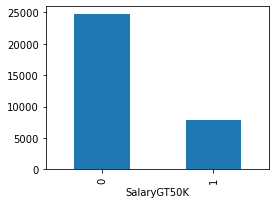

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=SalaryData.groupby('SalaryGT50K').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the salary of the person </b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
SalaryData.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  SalaryGT50K     32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [6]:
# Looking at the descriptive statistics of the data
SalaryData.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,SalaryGT50K
count,32537.000000,32537,3.253700e+04,32537,32537.000000,32537,32537,32537,32537,32537,32537.000000,32537.000000,32537.000000,32537,32537.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22673,NaN,10494,NaN,14970,4136,13187,27795,21815,NaN,NaN,NaN,29153,NaN
mean,38.585887,NaN,1.897808e+05,NaN,10.081815,NaN,NaN,NaN,NaN,NaN,1078.443741,87.368227,40.440329,NaN,0.240926
std,13.625962,NaN,1.055565e+05,NaN,2.571633,NaN,NaN,NaN,NaN,NaN,7387.957424,403.101833,12.346889,NaN,0.427652
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.369930e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
SalaryData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
SalaryGT50K           2
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

- **age** - Continuous.Selected.
- **workclass** - Categorical.Selected.Has missing values.
- **fnlwgt** - Qualitative.Not Selected.
- **education** - Categorical.Selected.
- **education_num** - Continuous.Selected.
- **marital_status** - Categorical.Selected.
- **occupation** - Categorical.Selected.Has missing values.
- **relationship** - Categorical.Selected.
- **race** - Categorical.Selected.
- **sex** - Categorical.Selected.
- **capital_gain** - Continuous.Selected.
- **capital_loss** - Continuous.Selected.
- **hours_per_week** - Continuous.Selected.
- **native_country** - Categorical.Selected.Has missing values.
- **SalaryGT50K** - Categorical.Selected.This is the Target Variable.

# Removing useless columns from the data

In [8]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['fnlwgt']
SalaryData = SalaryData.drop(UselessColumns,axis=1)
SalaryData.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted Eight categorical predictors in the data

Categorical Predictors: 
'workclass', 'education', 'marital_status','occupation','relationship','race','sex','native_country'

We use bar charts to see how the data is distributed for these categorical columns.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

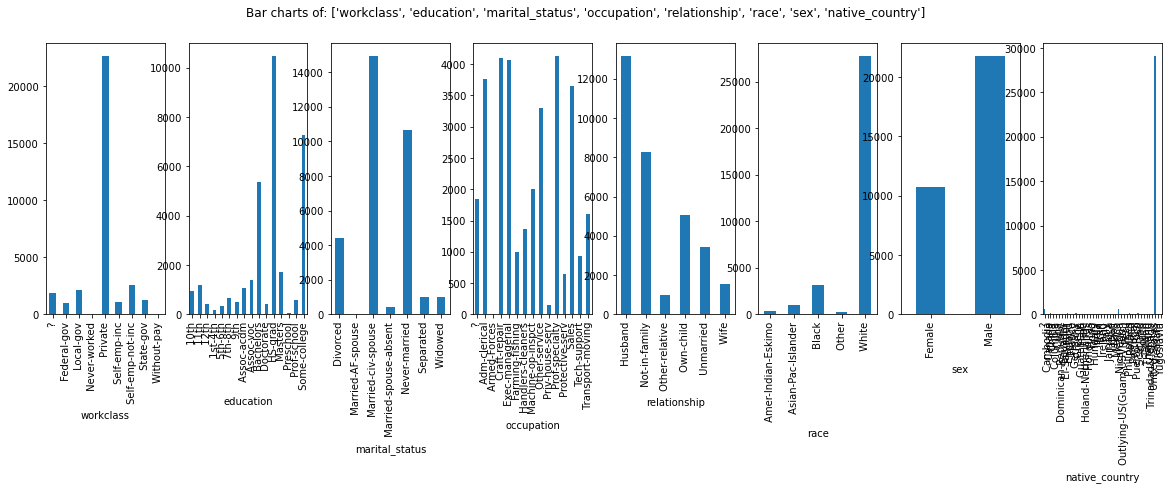

In [10]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=SalaryData, colsToPlot=[ 'workclass', 'education', 'marital_status','occupation','relationship','race','sex','native_country'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

 'workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Age',and 'Fare'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A26AE9BB0>,
      dtype=object)

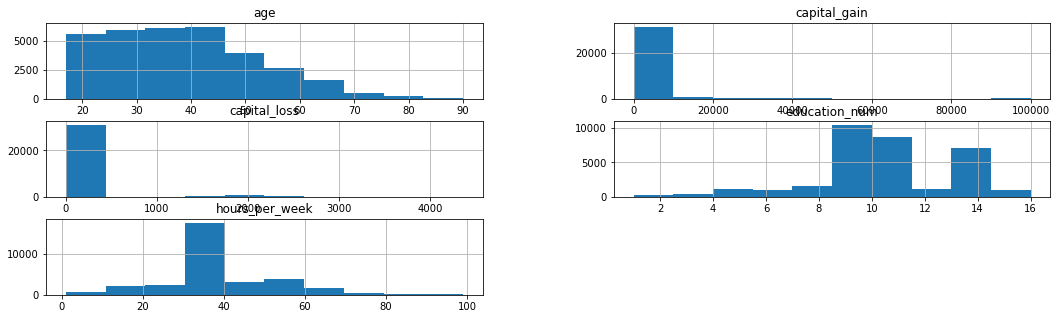

In [11]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
SalaryData.hist(['age', 'education_num','capital_gain','capital_loss','hours_per_week',], figsize=(18,5))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>age</b> : Selected. The distribution is good.
* <b>education_num</b>: Selected. The distribution is good.
* <b>capital_gain</b> : Not Selected. The distribution is not good and we see presence of outliers.
* <b>capital_loss</b>: Not Selected. The distribution is not good and we see presence of outliers.
* <b>hours_per_week</b>: Selected. The distribution is good.It has outliers beyond 80 and needs modifications.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'hours_per_week'

In [12]:
# Finding nearest values to 80 mark
SalaryData['hours_per_week'][SalaryData['hours_per_week']<80].sort_values(ascending=False)

4101     78
24252    78
7810     78
29688    78
30340    78
         ..
5590      1
20909     1
11451     1
5632      1
19750     1
Name: hours_per_week, Length: 32196, dtype: int64

Above result shows the nearest logical value is 78.0, hence, replacing any value above 80 with it.

In [13]:
# Replacing outliers with nearest possibe value
SalaryData['hours_per_week'][SalaryData['hours_per_week']>80] = 78

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A26EC5AF0>]],
      dtype=object)

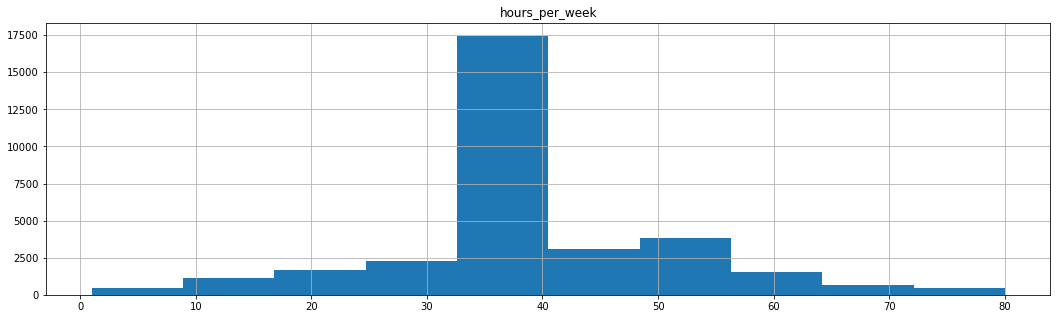

In [14]:
SalaryData.hist(['hours_per_week'], figsize=(18,5))

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [15]:
# Finding how many missing values are there for each column
SalaryData.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
SalaryGT50K       0
dtype: int64

In [16]:
#Checking before the Dummy Data substitution
FilterCondition1=SalaryData['workclass']==' ?'
FilterCondition2=SalaryData['occupation']==' ?'
FilterCondition3=SalaryData['native_country']==' ?'
WithoutDummy_workclass=SalaryData[FilterCondition1]
WithoutDummy_occupation=SalaryData[FilterCondition2]
WithoutDummy_occupation=SalaryData[FilterCondition3]
print("Number of Dummy workclass Data are: ", len(WithoutDummy_workclass))
print("Number of Dummy occupation Data are: ", len(WithoutDummy_occupation))
print("Number of Dummy native_country Data are: ", len(WithoutDummy_occupation))

Number of Dummy workclass Data are:  1836
Number of Dummy occupation Data are:  582
Number of Dummy native_country Data are:  582


We do not have missing values but we have Dummy Data with "?" in workclass, occupation and native_country. I am using Median and Mode value for the missing/dummy value replacement

In [17]:
# Replacing missing values of Age with median value
#TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(), inplace=True)

# Replacing missing values of workclass,occupation and native_country with Mode value

SalaryData['workclass'].replace({' ?':SalaryData['workclass'].mode()[0]}, inplace=True)
SalaryData['occupation'].replace({' ?':SalaryData['occupation'].mode()[0]}, inplace=True)
SalaryData['native_country'].replace({' ?':SalaryData['native_country'].mode()[0]}, inplace=True)

In [18]:
#Checking after the Dummy Data substitution
FilterCondition1=SalaryData['workclass']==' ?'
FilterCondition2=SalaryData['occupation']==' ?'
FilterCondition3=SalaryData['native_country']==' ?'
WithoutDummy_workclass=SalaryData[FilterCondition1]
WithoutDummy_occupation=SalaryData[FilterCondition2]
WithoutDummy_occupation=SalaryData[FilterCondition3]
print("Number of Dummy workclass Data are: ", len(WithoutDummy_workclass))
print("Number of Dummy occupation Data are: ", len(WithoutDummy_occupation))
print("Number of Dummy native_country Data are: ", len(WithoutDummy_occupation))

Number of Dummy workclass Data are:  0
Number of Dummy occupation Data are:  0
Number of Dummy native_country Data are:  0


In [19]:
# Checking missing values again after the treatment
SalaryData.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
SalaryGT50K       0
dtype: int64

In [244]:
# Create additional features here
# Feature engineering step like taking log/sqrt of variables

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

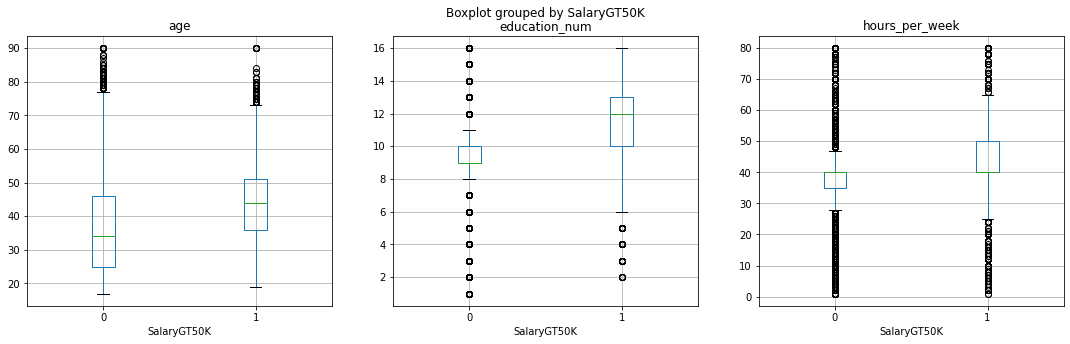

In [20]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['age','education_num','hours_per_week']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "SalaryGT50K"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    SalaryData.boxplot(column=PredictorCol, by='SalaryGT50K', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

The other chart exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of survival. It hints that these variables might be correlated with SalaryGT50K.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [21]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [22]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age','education_num','hours_per_week']
FunctionAnova(inpData=SalaryData, TargetVariable='SalaryGT50K', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with SalaryGT50K | P-Value: 0.0
education_num is correlated with SalaryGT50K | P-Value: 0.0
hours_per_week is correlated with SalaryGT50K | P-Value: 0.0


['age', 'education_num', 'hours_per_week']

The results of ANOVA confirm our visual analysis using box plots above.

Look at the P-Value of few columns, it got rejected by a little margin!! In such scenarios you may decide to include this variable which is at the boundry line and see if it helps to increase the accuracy.

<b>Final selected Continuous columns:</b>

'age', 'education_num', 'hours_per_week'

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [23]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=SalaryData['workclass'], columns=SalaryData['SalaryGT50K'])
CrossTabResult

SalaryGT50K,0,1
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,19357,5152
Self-emp-inc,494,622
Self-emp-not-inc,1816,724
State-gov,945,353
Without-pay,14,0


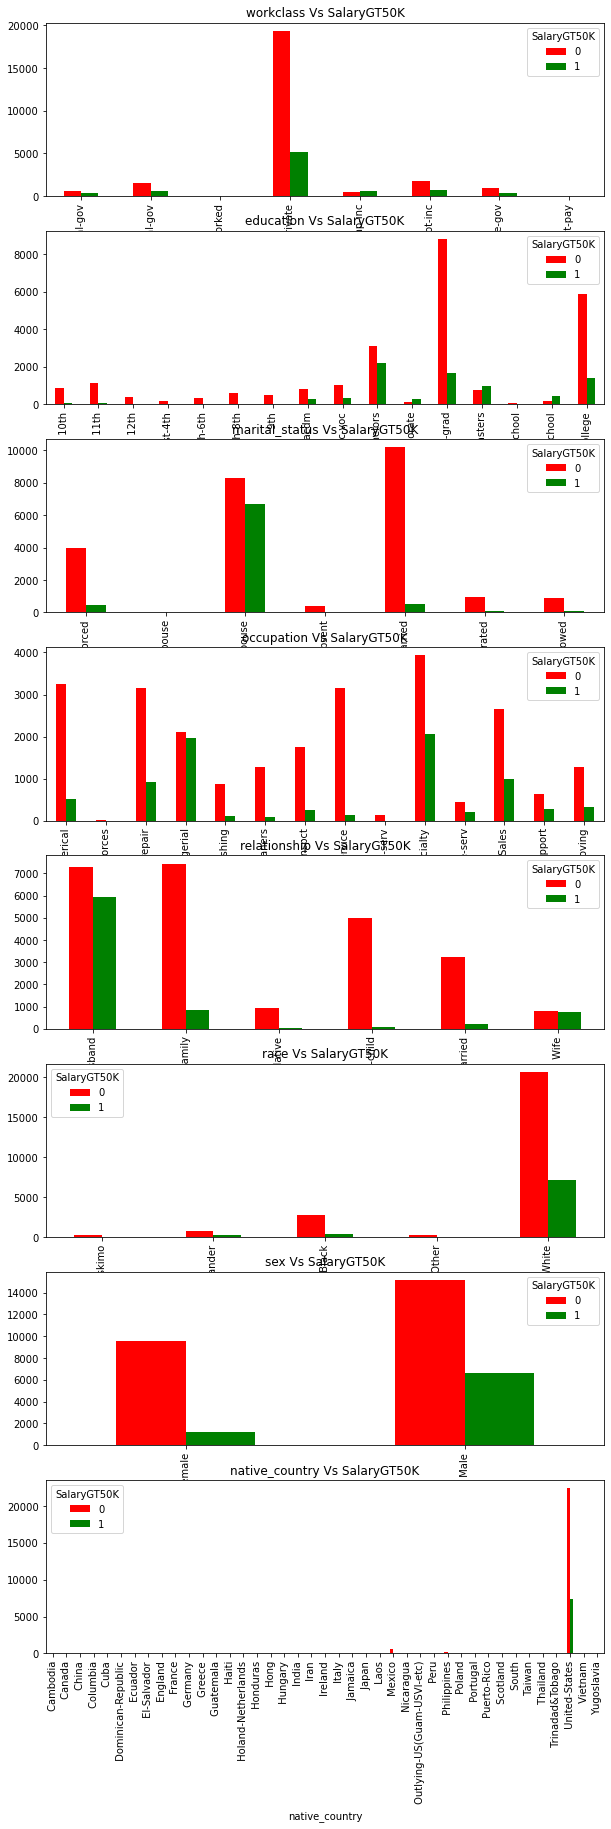

In [24]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=SalaryData[CategoricalCol], columns=SalaryData['SalaryGT50K'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'SalaryGT50K')

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [25]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [26]:
CategoricalVariables=['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country']

# Calling the function
FunctionChisq(inpData=SalaryData, 
              TargetVariable='SalaryGT50K',
              CategoricalVariablesList= CategoricalVariables)

workclass is correlated with SalaryGT50K | P-Value: 7.156800770833626e-195
education is correlated with SalaryGT50K | P-Value: 0.0
marital_status is correlated with SalaryGT50K | P-Value: 0.0
occupation is correlated with SalaryGT50K | P-Value: 0.0
relationship is correlated with SalaryGT50K | P-Value: 0.0
race is correlated with SalaryGT50K | P-Value: 2.2797874171824478e-70
sex is correlated with SalaryGT50K | P-Value: 0.0
native_country is correlated with SalaryGT50K | P-Value: 1.7625237545277189e-44


['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

<b>Finally selected Categorical variables:</b>

'workclass', 'education', 'marital_status', 'occupation', 'relationship','race','sex','native_country'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

Instead of original "education" column, I am selecting the "education_num". Which represents the ordinal property of the data.

In [27]:
SelectedColumns=['age', 'education_num', 'hours_per_week','workclass', 'education', 'marital_status', 'occupation', 'relationship','race','sex','SalaryGT50K']

# Selecting final columns
DataForML=SalaryData[SelectedColumns]
DataForML.head()

,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,SalaryGT50K
0,39,13,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0
1,50,13,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0
2,38,9,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0
3,53,7,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0
4,28,13,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0


In [28]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

## Converting the binary nominal variable to numeric using 1/0 mapping

In [29]:
# Converting the binary nominal variable sex to numeric
DataForML['sex'].replace({' Female':0, ' Male':1}, inplace=True)

## Converting the nominal variable to numeric 

In [30]:
DataForML['workclass'].replace({' State-gov':1,' Self-emp-not-inc':2,' Private':3,' Federal-gov':4,' Local-gov':5,' Self-emp-inc':6,' Without-pay':7,' Never-worked':8}, inplace=True)
DataForML['education'].replace({' Preschool':1,' 1st-4th':2,' 5th-6th':3,' 7th-8th':4,' 9th':5,' 10th':6,' 11th':7,' 12th':8,' HS-grad':9,' Some-college':10,' Bachelors':11,' Masters':12,' Prof-school':13,' Assoc-acdm':14,' Assoc-voc':15,' Doctorate':16}, inplace=True)
DataForML['marital_status'].replace({' Never-married':1,' Married-civ-spouse':2,' Divorced':3,' Married-spouse-absent':4,' Separated':5,' Married-AF-spouse':6,' Widowed':7}, inplace=True)
DataForML['occupation'].replace({' Adm-clerical':1,' Exec-managerial':2,' Handlers-cleaners':3,' Prof-specialty':4,' Other-service':5,' Sales':6,' Craft-repair':7,' Transport-moving':8,' Farming-fishing':9,' Machine-op-inspct':10,' Tech-support':11,' Protective-serv':12,' Armed-Forces':13,' Priv-house-serv':14}, inplace=True)
DataForML['relationship'].replace({' Not-in-family':1,' Husband':2,' Wife':3,' Own-child':4,' Unmarried':5,' Other-relative':6}, inplace=True)
DataForML['race'].replace({' White':1,' Black':2,' Asian-Pac-Islander':3,' Amer-Indian-Eskimo':4,' Other':5}, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [32]:
# Treating all the nominal variables at once using dummy variables
# DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
#DataForML_Numeric['SalaryGT50K']=DataForML['SalaryGT50K']

DataForML_Numeric=DataForML
# Printing sample rows
DataForML_Numeric.head()

,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,SalaryGT50K
0,39,13,40,1,11,1,1,1,1,1,0
1,50,13,13,2,11,2,2,2,1,1,0
2,38,9,40,3,9,3,3,1,1,1,0
3,53,7,40,3,7,2,3,2,2,1,0
4,28,13,40,3,11,2,4,3,2,0,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [33]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'education_num', 'hours_per_week', 'workclass', 'education',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'SalaryGT50K'],
      dtype='object')

In [34]:
# Separate Target Variable and Predictor Variables
TargetVariable='SalaryGT50K'
Predictors=['age', 'education_num', 'hours_per_week', 'workclass', 'education',
       'marital_status', 'occupation', 'relationship', 'race', 'sex']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [35]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22775, 10)
(22775,)
(9762, 10)
(9762,)


# Logistic Regression

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7405
           1       0.65      0.39      0.49      2357

    accuracy                           0.80      9762
   macro avg       0.74      0.66      0.68      9762
weighted avg       0.78      0.80      0.78      9762

[[6912 1444]
 [ 493  913]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.78146074 0.77391111 0.79103345 0.7773919  0.78854549 0.78690678
 0.78389866 0.79195617 0.78764726 0.77817834]

Final Average Accuracy of the model: 0.78


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7405
           1       0.72      0.41      0.52      2357

    accuracy                           0.82      9762
   macro avg       0.78      0.68      0.71      9762
weighted avg       0.81      0.82      0.80      9762

[[7026  379]
 [1389  968]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.79190851 0.79252452 0.80832356 0.79210456 0.80198695 0.80241725
 0.80314669 0.81023304 0.80465091 0.79821034]

Final Average Accuracy of the model: 0.8


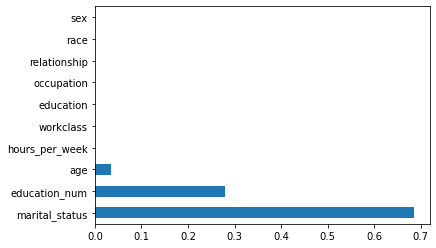

In [38]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [35]:
# Installing the required library for plotting the decision tree
#!pip install dtreeplt

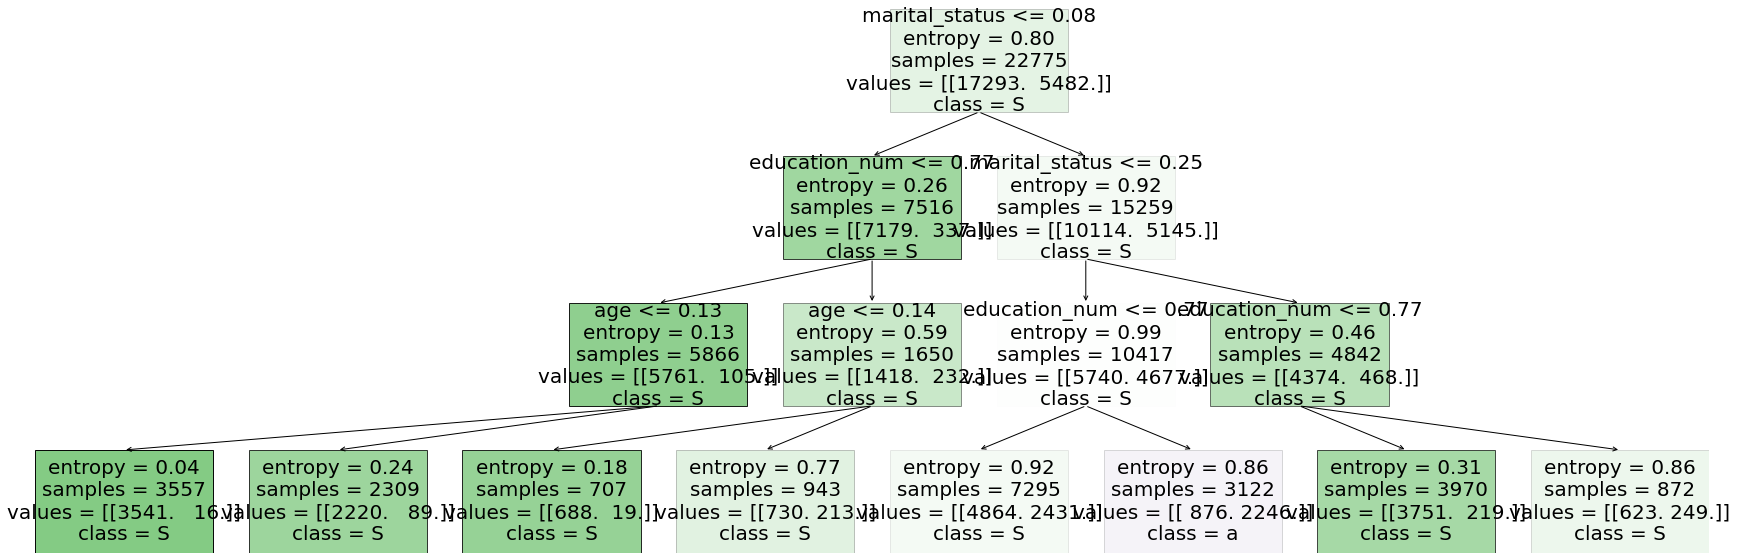

In [39]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)
# Double click on the graph to zoom in

## Random Forest

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7405
           1       0.73      0.41      0.52      2357

    accuracy                           0.82      9762
   macro avg       0.78      0.68      0.71      9762
weighted avg       0.81      0.82      0.80      9762

[[7042  363]
 [1390  967]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.79200688 0.79313276 0.80917265 0.7918457  0.80120442 0.80237923
 0.80066799 0.81265772 0.80498147 0.79800214]

Final Average Accuracy of the model: 0.8


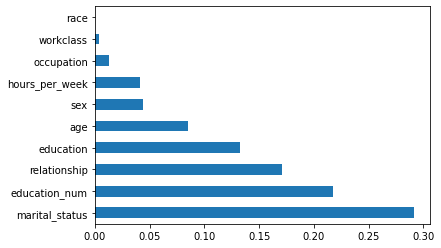

In [40]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting one of the Decision Trees in Random Forest

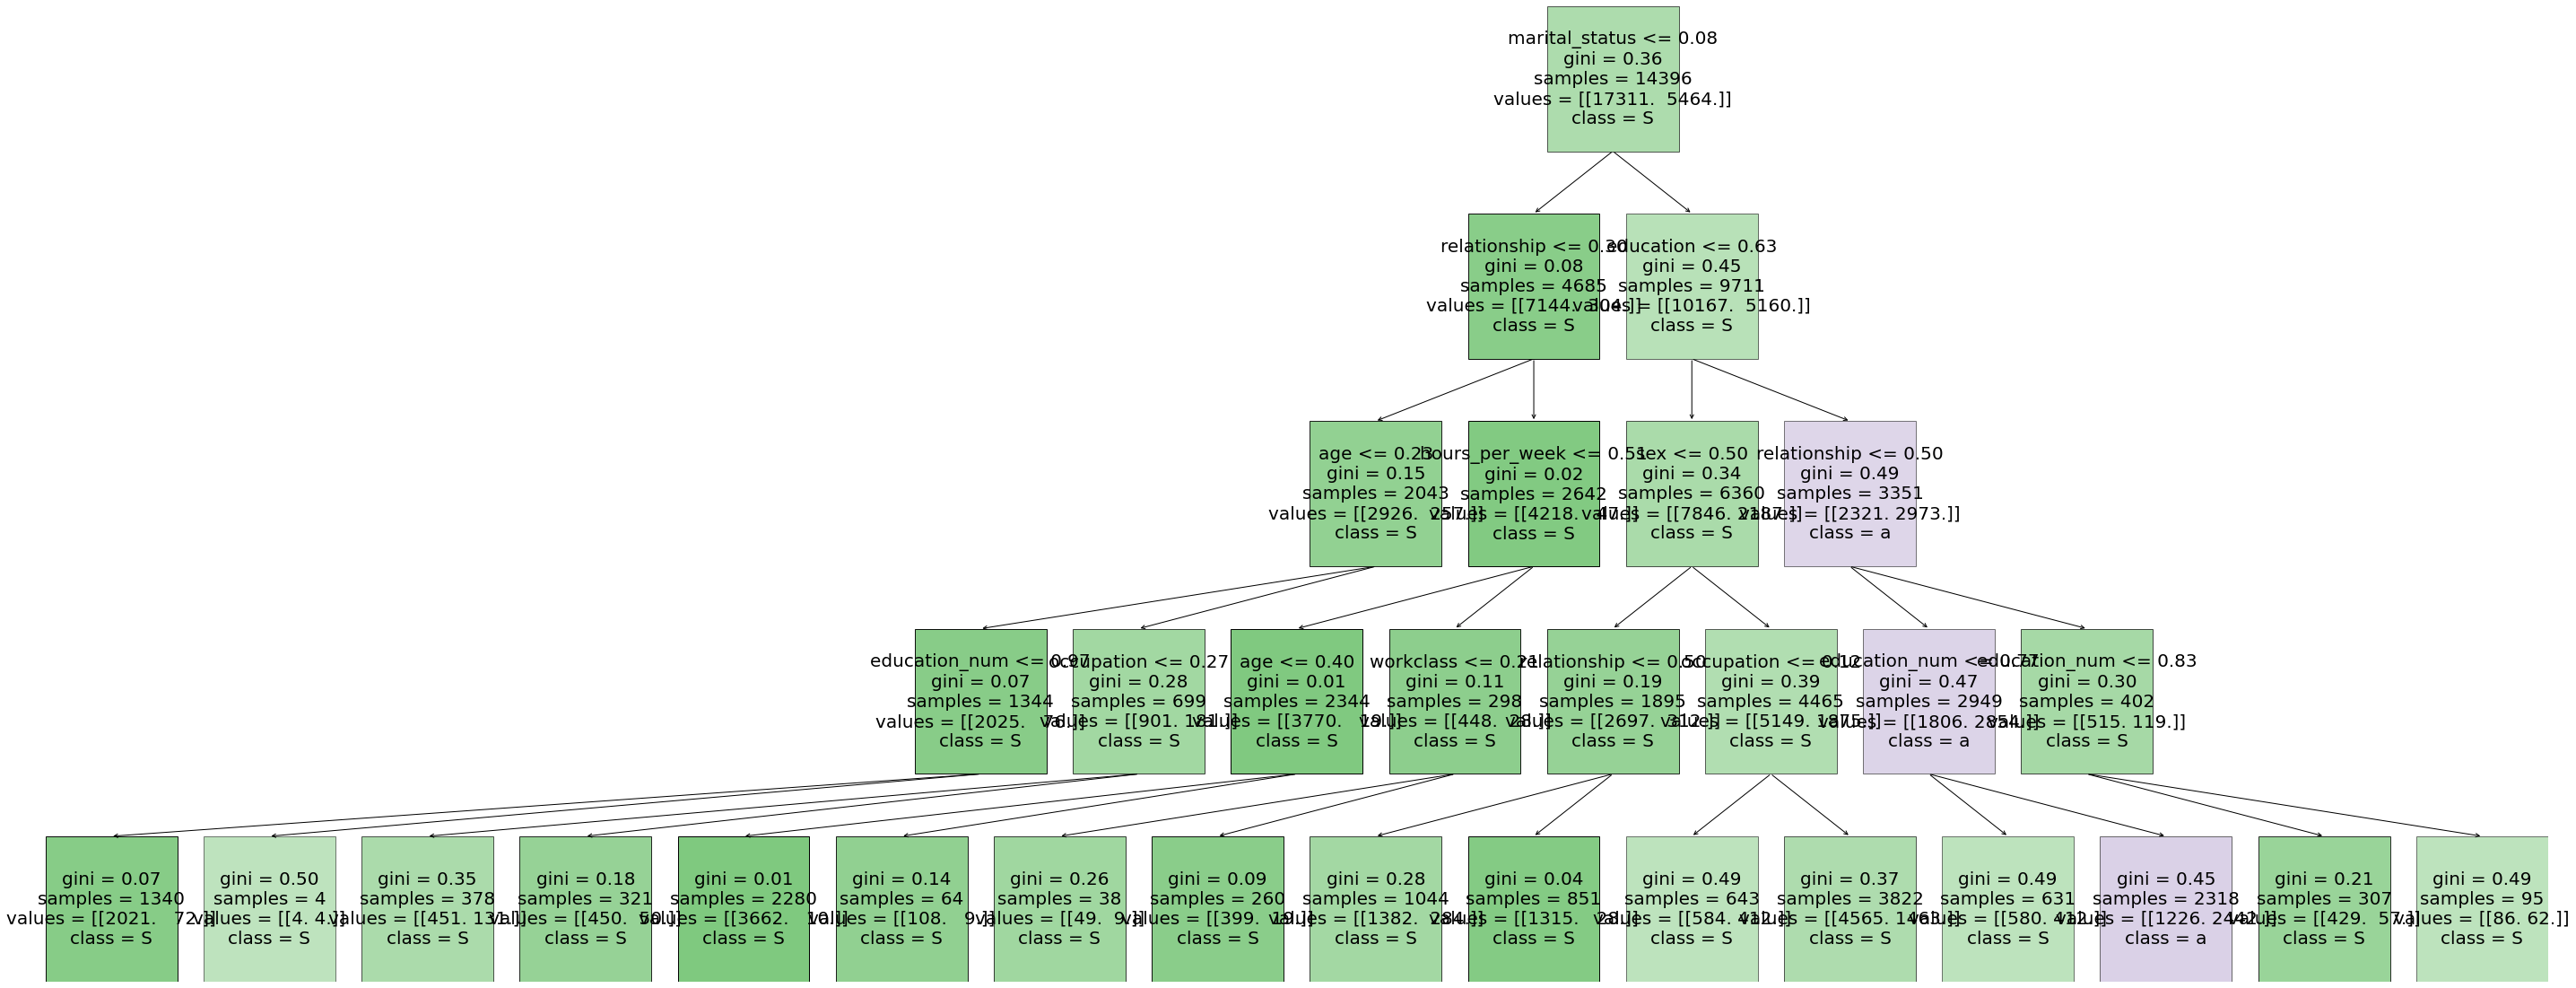

In [41]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

## AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7405
           1       0.72      0.41      0.52      2357

    accuracy                           0.82      9762
   macro avg       0.78      0.68      0.71      9762
weighted avg       0.81      0.82      0.80      9762

[[7031  374]
 [1393  964]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.79216741 0.79236121 0.80935505 0.79271965 0.80241336 0.80252999
 0.80341002 0.8106177  0.80570748 0.79737568]

Final Average Accuracy of the model: 0.8


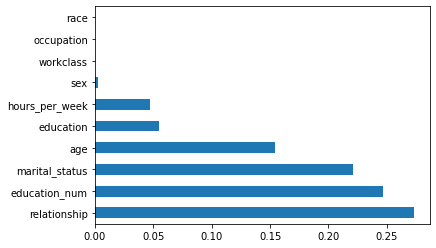

In [42]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting one of the Decision trees from Adaboost

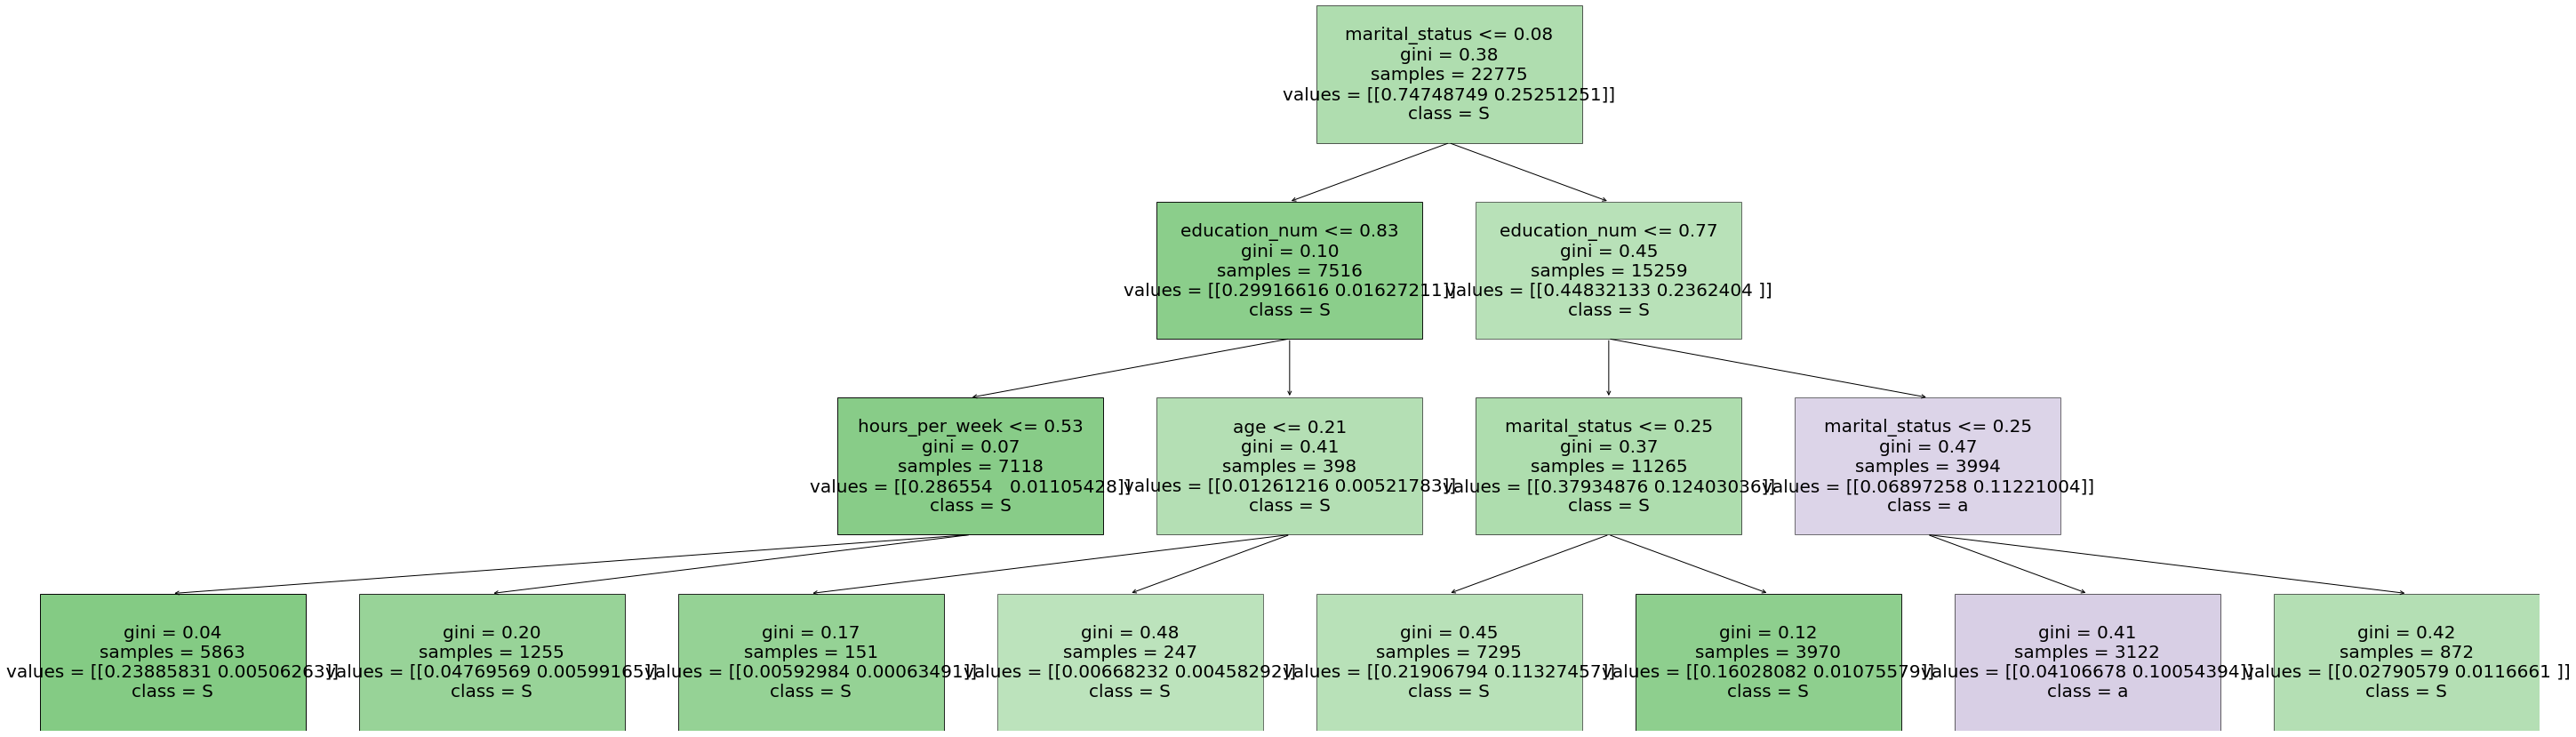

In [43]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[11:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    

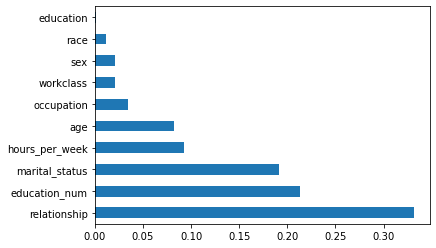

In [44]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting a single Decision tree out of XGBoost

In [45]:
# Setting up the os path for the Graphviz
import os 
os.environ["PATH"] += os.pathsep + 'C:/Users/Anonymous/anaconda3/Library/bin/graphviz'

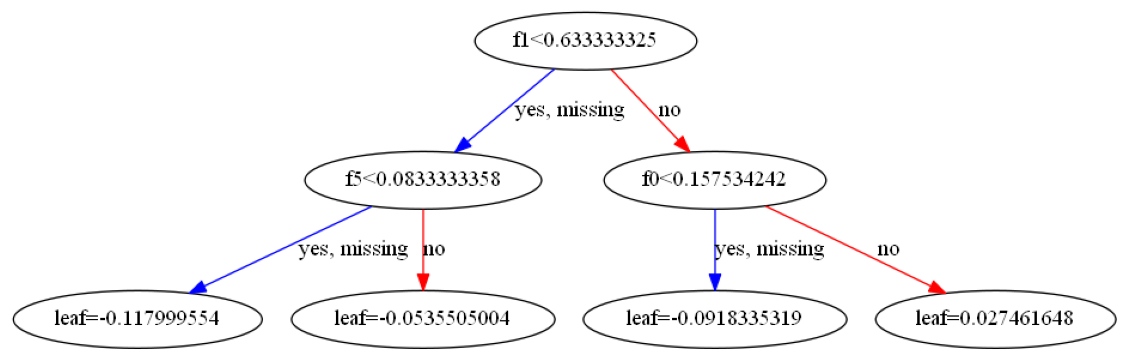

In [46]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## KNN

In [47]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7405
           1       0.67      0.45      0.54      2357

    accuracy                           0.81      9762
   macro avg       0.75      0.69      0.71      9762
weighted avg       0.80      0.81      0.80      9762

[[6867  538]
 [1288 1069]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.80518928 0.78935898 0.80689978 0.80361807 0.81684341 0.7940385
 0.79657345 0.81315487 0.8059212  0.79975217]

Final Average Accuracy of the model: 0.8


## SVM

In [50]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=20, gamma=0.01)
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7405
           1       0.70      0.38      0.49      2357

    accuracy                           0.81      9762
   macro avg       0.77      0.66      0.69      9762
weighted avg       0.80      0.81      0.79      9762

[[7028  377]
 [1463  894]]
Accuracy of the model on Testing Sample Data: 0.79


KeyboardInterrupt: 

## Naive Bayes

In [51]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7405
           1       0.52      0.75      0.61      2357

    accuracy                           0.77      9762
   macro avg       0.71      0.76      0.73      9762
weighted avg       0.81      0.77      0.78      9762

[[5767 1638]
 [ 590 1767]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.78113015 0.78040361 0.79009119 0.78067171 0.78598194 0.78488338
 0.7864589  0.78680931 0.79208124 0.79127033]

Final Average Accuracy of the model: 0.79


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

I am choosing <b>Decision Trees</b> as the final model since it is very fast for this data!

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

'age', 'marital_status', 'education_num', 'relationship'
As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [52]:
# Separate Target Variable and Predictor Variables
TargetVariable='SalaryGT50K'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'marital_status', 'education_num', 'relationship']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(32537, 4)
(32537,)


#### Step 1. Retraining the model using 100% data

In [53]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Training the model on 100% Data available
FinalDecisionTreeModel=clf.fit(X,y)

#### Cross validating the final model accuracy with less predictors

In [54]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.79190851 0.79252452 0.80832356 0.79210456 0.80198695 0.80241725
 0.80314669 0.81023304 0.80465091 0.79821034]

Final Average Accuracy of the model: 0.8


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [55]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Anonymous


#### Step 3. Create a python function

In [69]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Converting the binary nominal variable sex to numeric
    #InputData['Sex'].replace({'female':0, 'male':1}, inplace=True)
    InputData['marital_status'].replace({' Never-married':1,' Married-civ-spouse':2,' Divorced':3,' Married-spouse-absent':4,' Separated':5,' Married-AF-spouse':6,' Widowed':7}, inplace=True)
    InputData['occupation'].replace({' Adm-clerical':1,' Exec-managerial':2,' Handlers-cleaners':3,' Prof-specialty':4,' Other-service':5,' Sales':6,' Craft-repair':7,' Transport-moving':8,' Farming-fishing':9,' Machine-op-inspct':10,' Tech-support':11,' Protective-serv':12,' Armed-Forces':13,' Priv-house-serv':14}, inplace=True)
    InputData['relationship'].replace({' Not-in-family':1,' Husband':2,' Wife':3,' Own-child':4,' Unmarried':5,' Other-relative':6}, inplace=True)

    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['age','marital_status','education_num','relationship']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [70]:
# Calling the function for some new cases
NewSampleData=pd.DataFrame(
data=[[43,1,15,1],
     [42,1,15,1],
     [42,5,15,5]],
columns=['age', 'marital_status', 'education_num', 'relationship'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   age  marital_status  education_num  relationship
0   43               1             15             1
1   42               1             15             1
2   42               5             15             5


,Predicted Status
0,0
1,0
2,0


The Function FunctionPredictResult can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the available cases.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

 ## Creating the model with few parameters

## Function for predictions API

In [71]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_age , inp_marital_status, inp_education_num, inp_relationship):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_marital_status, inp_education_num, inp_relationship]],
     columns=['age', 'marital_status', 'education_num', 'relationship'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_age=71,
                             inp_marital_status =2,
                             inp_education_num=15,
                             inp_relationship=1
                             )

'{"Predicted Status":{"0":1}}'

In [54]:
# Installing the flask library required to create the API
#!pip install flask

## Creating Flask API

In [72]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [80]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        marital_status_value=float(request.args.get('marital_status'))
        education_num_value=float(request.args.get('education_num'))
        relationship_value = float(request.args.get('relationship'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                inp_age=age_value,
                                                inp_marital_status=marital_status_value, 
                                                inp_education_num=education_num_value, 
                                                inp_relationship=relationship_value
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

## Starting the API engine

In [81]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jun/2022 12:36:35] "GET /prediction_api?age=71&marital_status=5&education_num=2&relationship=1 HTTP/1.1" 200 -


## Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?age=71&marital_status=5&education_num=2&relationship=1

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.